In [2]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import pyspark
from pyspark import SparkContext
from pyspark import SQLContext
from pyspark import sql
from pyspark.sql import SparkSession

In [73]:
#Step 04: Initialize PySpark Session
#Now all set for PySpark. Next, you have to initialize the PySpark session before coding.
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [74]:
spark

In [75]:
df=spark.read.csv('/content/drive/MyDrive/Twitter data.csv')

In [76]:
df.show(5)

+---+----------+--------------------+--------+---------------+--------------------+
|_c0|       _c1|                 _c2|     _c3|            _c4|                 _c5|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+---+----------+--------------------+--------+---------------+--------------------+
only showing top 5 rows



In [77]:
df.columns

['_c0', '_c1', '_c2', '_c3', '_c4', '_c5']

In [78]:
df.dtypes

[('_c0', 'string'),
 ('_c1', 'string'),
 ('_c2', 'string'),
 ('_c3', 'string'),
 ('_c4', 'string'),
 ('_c5', 'string')]

In [79]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



In [80]:
from pyspark.sql.types import *

In [81]:
#Step 1 defining column names
df = df.withColumnRenamed('_c0', 'Target') \
       .withColumnRenamed('_c1', 'ID') \
       .withColumnRenamed('_c2', 'Date and Time') \
       .withColumnRenamed('_c3', 'Flag') \
       .withColumnRenamed('_c4', 'User') \
       .withColumnRenamed('_c5', 'Text')

In [82]:
df.show()

+------+----------+--------------------+--------+---------------+--------------------+
|Target|        ID|       Date and Time|    Flag|           User|                Text|
+------+----------+--------------------+--------+---------------+--------------------+
|     0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|     0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|     0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|     0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|     0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|     0|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|     0|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|     0|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|     0|1467811795|Mon Apr 06 22:20:...|NO_

In [83]:
df.printSchema()

root
 |-- Target: string (nullable = true)
 |-- ID: string (nullable = true)
 |-- Date and Time: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- User: string (nullable = true)
 |-- Text: string (nullable = true)



In [84]:
df.count()

1600000

In [85]:
df.createOrReplaceTempView("Twitter")

In [86]:
data=spark.sql("select * from Twitter limit 10")

In [87]:
data.show()

+------+----------+--------------------+--------+---------------+--------------------+
|Target|        ID|       Date and Time|    Flag|           User|                Text|
+------+----------+--------------------+--------+---------------+--------------------+
|     0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|     0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|     0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|     0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|     0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|     0|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|     0|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|     0|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|     0|1467811795|Mon Apr 06 22:20:...|NO_

In [88]:
distinct_Flag=spark.sql('select distinct(Flag) from Twitter')

In [89]:
distinct_Flag.show()

+--------+
|    Flag|
+--------+
|NO_QUERY|
+--------+



In [90]:
distinct_User=spark.sql('select distinct(User) from Twitter')

In [91]:
distinct_User.count()

659775

In [92]:
#Remove columns in PySpark
df = df.drop('Flag')

In [93]:
df.show(5)

+------+----------+--------------------+---------------+--------------------+
|Target|        ID|       Date and Time|           User|                Text|
+------+----------+--------------------+---------------+--------------------+
|     0|1467810369|Mon Apr 06 22:19:...|_TheSpecialOne_|@switchfoot http:...|
|     0|1467810672|Mon Apr 06 22:19:...|  scotthamilton|is upset that he ...|
|     0|1467810917|Mon Apr 06 22:19:...|       mattycus|@Kenichan I dived...|
|     0|1467811184|Mon Apr 06 22:19:...|        ElleCTF|my whole body fee...|
|     0|1467811193|Mon Apr 06 22:19:...|         Karoli|@nationwideclass ...|
+------+----------+--------------------+---------------+--------------------+
only showing top 5 rows



In [94]:
text=spark.sql('select Target,Text from Twitter')

In [95]:
text.show()

+------+--------------------+
|Target|                Text|
+------+--------------------+
|     0|@switchfoot http:...|
|     0|is upset that he ...|
|     0|@Kenichan I dived...|
|     0|my whole body fee...|
|     0|@nationwideclass ...|
|     0|@Kwesidei not the...|
|     0|         Need a hug |
|     0|@LOLTrish hey  lo...|
|     0|@Tatiana_K nope t...|
|     0|@twittera que me ...|
|     0|spring break in p...|
|     0|I just re-pierced...|
|     0|@caregiving I cou...|
|     0|@octolinz16 It it...|
|     0|@smarrison i woul...|
|     0|@iamjazzyfizzle I...|
|     0|Hollis' death sce...|
|     0|about to file taxes |
|     0|@LettyA ahh ive a...|
|     0|@FakerPattyPattz ...|
+------+--------------------+
only showing top 20 rows



In [96]:
text.createOrReplaceTempView("textdata")

#Preprocessing Steps

1. Lower Casing: Each text is converted to lowercase.

2. Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".

3. Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")

4. Replacing Usernames: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")

5. Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.

7. Removing Short Words: Words with length less than 2 are removed.

8. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

9. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)


In [97]:
from pyspark.sql.functions import col,lower, upper, substring

In [98]:
# converted to lower case
df = spark.table('textdata').withColumn('Text', lower(col('Text')))

In [99]:
df.show()

+------+--------------------+
|Target|                Text|
+------+--------------------+
|     0|@switchfoot http:...|
|     0|is upset that he ...|
|     0|@kenichan i dived...|
|     0|my whole body fee...|
|     0|@nationwideclass ...|
|     0|@kwesidei not the...|
|     0|         need a hug |
|     0|@loltrish hey  lo...|
|     0|@tatiana_k nope t...|
|     0|@twittera que me ...|
|     0|spring break in p...|
|     0|i just re-pierced...|
|     0|@caregiving i cou...|
|     0|@octolinz16 it it...|
|     0|@smarrison i woul...|
|     0|@iamjazzyfizzle i...|
|     0|hollis' death sce...|
|     0|about to file taxes |
|     0|@lettya ahh ive a...|
|     0|@fakerpattypattz ...|
+------+--------------------+
only showing top 20 rows



In [100]:
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import when 

In [101]:
#Removing websites
df = df.withColumn('Text', regexp_replace('Text', r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)", ''))

In [102]:
df.show()

+------+--------------------+
|Target|                Text|
+------+--------------------+
|     0|@switchfoot  - aw...|
|     0|is upset that he ...|
|     0|@kenichan i dived...|
|     0|my whole body fee...|
|     0|@nationwideclass ...|
|     0|@kwesidei not the...|
|     0|         need a hug |
|     0|@loltrish hey  lo...|
|     0|@tatiana_k nope t...|
|     0|@twittera que me ...|
|     0|spring break in p...|
|     0|i just re-pierced...|
|     0|@caregiving i cou...|
|     0|@octolinz16 it it...|
|     0|@smarrison i woul...|
|     0|@iamjazzyfizzle i...|
|     0|hollis' death sce...|
|     0|about to file taxes |
|     0|@lettya ahh ive a...|
|     0|@fakerpattypattz ...|
+------+--------------------+
only showing top 20 rows



In [103]:
#Removing users mentioned
df =df.withColumn('Text', regexp_replace('Text', '@[^\s]+', ''))

In [104]:
df.show()

+------+--------------------+
|Target|                Text|
+------+--------------------+
|     0|  - awww, that's ...|
|     0|is upset that he ...|
|     0| i dived many tim...|
|     0|my whole body fee...|
|     0| no, it's not beh...|
|     0| not the whole crew |
|     0|         need a hug |
|     0| hey  long time n...|
|     0| nope they didn't...|
|     0|     que me muera ? |
|     0|spring break in p...|
|     0|i just re-pierced...|
|     0| i couldn't bear ...|
|     0| it it counts, id...|
|     0| i would've been ...|
|     0| i wish i got to ...|
|     0|hollis' death sce...|
|     0|about to file taxes |
|     0| ahh ive always w...|
|     0| oh dear. were yo...|
+------+--------------------+
only showing top 20 rows



In [105]:
#Removing constants
df =df.withColumn('Text', regexp_replace('Text', "[^a-zA-Z0-9]", ' '))

In [106]:
df.show()

+------+--------------------+
|Target|                Text|
+------+--------------------+
|     0|    awww  that s ...|
|     0|is upset that he ...|
|     0| i dived many tim...|
|     0|my whole body fee...|
|     0| no  it s not beh...|
|     0| not the whole crew |
|     0|         need a hug |
|     0| hey  long time n...|
|     0| nope they didn t...|
|     0|     que me muera   |
|     0|spring break in p...|
|     0|i just re pierced...|
|     0| i couldn t bear ...|
|     0| it it counts  id...|
|     0| i would ve been ...|
|     0| i wish i got to ...|
|     0|hollis  death sce...|
|     0|about to file taxes |
|     0| ahh ive always w...|
|     0| oh dear  were yo...|
+------+--------------------+
only showing top 20 rows



In [39]:
#Useless
#df = df.withColumn('Text', regexp_replace('Text', r"(.)\1\1+", r"\1\1"))

In [107]:
df.show()

+------+--------------------+
|Target|                Text|
+------+--------------------+
|     0|    awww  that s ...|
|     0|is upset that he ...|
|     0| i dived many tim...|
|     0|my whole body fee...|
|     0| no  it s not beh...|
|     0| not the whole crew |
|     0|         need a hug |
|     0| hey  long time n...|
|     0| nope they didn t...|
|     0|     que me muera   |
|     0|spring break in p...|
|     0|i just re pierced...|
|     0| i couldn t bear ...|
|     0| it it counts  id...|
|     0| i would ve been ...|
|     0| i wish i got to ...|
|     0|hollis  death sce...|
|     0|about to file taxes |
|     0| ahh ive always w...|
|     0| oh dear  were yo...|
+------+--------------------+
only showing top 20 rows



In [108]:
#Removing emojis
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}


In [109]:
df=df.withColumn('Text', regexp_replace('Text','emojis','EMOJI')) 

In [110]:
df.show()

+------+--------------------+
|Target|                Text|
+------+--------------------+
|     0|    awww  that s ...|
|     0|is upset that he ...|
|     0| i dived many tim...|
|     0|my whole body fee...|
|     0| no  it s not beh...|
|     0| not the whole crew |
|     0|         need a hug |
|     0| hey  long time n...|
|     0| nope they didn t...|
|     0|     que me muera   |
|     0|spring break in p...|
|     0|i just re pierced...|
|     0| i couldn t bear ...|
|     0| it it counts  id...|
|     0| i would ve been ...|
|     0| i wish i got to ...|
|     0|hollis  death sce...|
|     0|about to file taxes |
|     0| ahh ive always w...|
|     0| oh dear  were yo...|
+------+--------------------+
only showing top 20 rows



#Converting Spark dataframe to pandas for further ML Algorithm

In [111]:
df= df.toPandas()

In [112]:
df.dtypes

Target    object
Text      object
dtype: object

In [113]:
df.head()

,Target,Text
0,0,awww that s a bummer you shoulda got da...
1,0,is upset that he can t update his facebook by ...
2,0,i dived many times for the ball managed to s...
3,0,my whole body feels itchy and like its on fire
4,0,no it s not behaving at all i m mad why am...


In [114]:
df.Target.value_counts()

0    800000
4    800000
Name: Target, dtype: int64

In [115]:
df['Target']=df.Target.replace('4','1')

In [116]:
df.Target.value_counts()

0    800000
1    800000
Name: Target, dtype: int64

In [117]:
df.head()

,Target,Text
0,0,awww that s a bummer you shoulda got da...
1,0,is upset that he can t update his facebook by ...
2,0,i dived many times for the ball managed to s...
3,0,my whole body feels itchy and like its on fire
4,0,no it s not behaving at all i m mad why am...


In [118]:
df.tail()

,Target,Text
1599995,1,just woke up having no school is the best fee...
1599996,1,thewdb com very cool to hear old walt interv...
1599997,1,are you ready for your mojo makeover ask me f...
1599998,1,happy 38th birthday to my boo of alll time ...
1599999,1,happy charitytuesday


In [119]:
from nltk.stem import WordNetLemmatizer 
from pyspark.ml import *
from pyspark.ml.feature import *


In [120]:
#model = Tokenizer(inputCol = "Text", outputCol="token")
#result = model.transform(df) 
#result.show()

In [121]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['Text'].apply(regexp.tokenize)
df.head(10)

,Target,Text,text_token
0,0,awww that s a bummer you shoulda got da...,"[awww, that, s, a, bummer, you, shoulda, got, ..."
1,0,is upset that he can t update his facebook by ...,"[is, upset, that, he, can, t, update, his, fac..."
2,0,i dived many times for the ball managed to s...,"[i, dived, many, times, for, the, ball, manage..."
3,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,0,no it s not behaving at all i m mad why am...,"[no, it, s, not, behaving, at, all, i, m, mad,..."
5,0,not the whole crew,"[not, the, whole, crew]"
6,0,need a hug,"[need, a, hug]"
7,0,hey long time no see yes rains a bit onl...,"[hey, long, time, no, see, yes, rains, a, bit,..."
8,0,nope they didn t have it,"[nope, they, didn, t, have, it]"
9,0,que me muera,"[que, me, muera]"


In [122]:
#Stop words are words in a stop list which are dropped before analysing natural 
#language data since they don’t contain valuable information (like “will”, “and”, “or”, “has”, 

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [123]:
from nltk.corpus import stopwords
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [124]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [125]:
#Removing stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(10)

,Target,Text,text_token
0,0,awww that s a bummer you shoulda got da...,"[awww, bummer, shoulda, got, david, carr, thir..."
1,0,is upset that he can t update his facebook by ...,"[upset, update, facebook, texting, might, cry,..."
2,0,i dived many times for the ball managed to s...,"[dived, many, times, ball, managed, save, 50, ..."
3,0,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]"
4,0,no it s not behaving at all i m mad why am...,"[behaving, mad, see]"
5,0,not the whole crew,"[whole, crew]"
6,0,need a hug,"[need, hug]"
7,0,hey long time no see yes rains a bit onl...,"[hey, long, time, see, yes, rains, bit, bit, l..."
8,0,nope they didn t have it,[nope]
9,0,que me muera,"[que, muera]"


In [126]:
#We first change the format of text_token to strings and keep only words which are longer than 2 letters
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [127]:
df[['Text', 'text_token', 'text_string']].head()

,Text,text_token,text_string
0,awww that s a bummer you shoulda got da...,"[awww, bummer, shoulda, got, david, carr, thir...",awww bummer shoulda got david carr third day
1,is upset that he can t update his facebook by ...,"[upset, update, facebook, texting, might, cry,...",upset update facebook texting might cry result...
2,i dived many times for the ball managed to s...,"[dived, many, times, ball, managed, save, 50, ...",dived many times ball managed save rest bounds
3,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]",whole body feels itchy like fire
4,no it s not behaving at all i m mad why am...,"[behaving, mad, see]",behaving mad see


In [128]:
df.head()

,Target,Text,text_token,text_string
0,0,awww that s a bummer you shoulda got da...,"[awww, bummer, shoulda, got, david, carr, thir...",awww bummer shoulda got david carr third day
1,0,is upset that he can t update his facebook by ...,"[upset, update, facebook, texting, might, cry,...",upset update facebook texting might cry result...
2,0,i dived many times for the ball managed to s...,"[dived, many, times, ball, managed, save, 50, ...",dived many times ball managed save rest bounds
3,0,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]",whole body feels itchy like fire
4,0,no it s not behaving at all i m mad why am...,"[behaving, mad, see]",behaving mad see


In [129]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [130]:
from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string'].apply(wordnet_lem.lemmatize)

In [131]:
df[['text_string_lem']].head(10)

,text_string_lem
0,awww bummer shoulda got david carr third day
1,upset update facebook texting might cry result...
2,dived many times ball managed save rest bounds
3,whole body feels itchy like fire
4,behaving mad see
5,whole crew
6,need hug
7,hey long time see yes rains bit bit lol fine t...
8,nope
9,que muera


In [132]:
#check if the columns are equal
df['is_equal']= (df['text_string']==df['text_string_lem'])

In [133]:
#show level count
df.is_equal.value_counts()

True     1596874
False       3126
Name: is_equal, dtype: int64

In [134]:
df.head()

,Target,Text,text_token,text_string,text_string_lem,is_equal
0,0,awww that s a bummer you shoulda got da...,"[awww, bummer, shoulda, got, david, carr, thir...",awww bummer shoulda got david carr third day,awww bummer shoulda got david carr third day,True
1,0,is upset that he can t update his facebook by ...,"[upset, update, facebook, texting, might, cry,...",upset update facebook texting might cry result...,upset update facebook texting might cry result...,True
2,0,i dived many times for the ball managed to s...,"[dived, many, times, ball, managed, save, 50, ...",dived many times ball managed save rest bounds,dived many times ball managed save rest bounds,True
3,0,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]",whole body feels itchy like fire,whole body feels itchy like fire,True
4,0,no it s not behaving at all i m mad why am...,"[behaving, mad, see]",behaving mad see,behaving mad see,True


In [135]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])

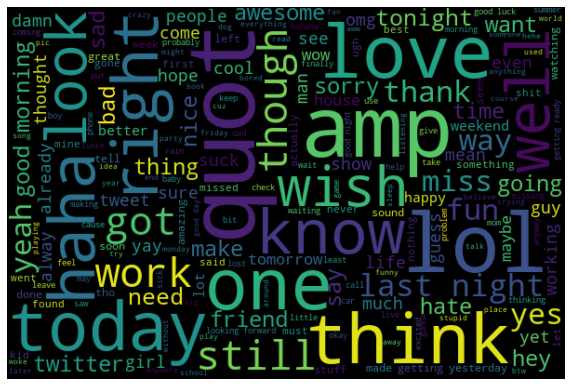

In [136]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem )       
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [137]:
new_df=df[['Target','text_string_lem']]

In [138]:
new_df.head()

,Target,text_string_lem
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many times ball managed save rest bounds
3,0,whole body feels itchy like fire
4,0,behaving mad see


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [140]:
y=new_df['Target']
x=new_df['text_string_lem']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.05, random_state = 0)

In [146]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape 

((1520000,), (80000,), (1520000,), (80000,))

In [147]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


In [148]:
#Tranforming the dataset
#Transforming the X_train and X_test dataset into matrix of TF-IDF Features by using the TF-IDF Vectoriser. This datasets will be used to train the model and test against it.
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [149]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

#Using Logistic regression

In [150]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

In [151]:
y_pred=LRmodel.predict(X_test)

In [152]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(y_test, y_pred)
cm

array([[31055,  8934],
       [ 7605, 32406]])

In [154]:
LRmodel.score(X_test, y_test)

0.7932625

#Using Naive Bayes(Bernoulli model)

In [155]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)

BernoulliNB(alpha=2)

In [156]:
y_pred2=BNBmodel.predict(X_test)

In [157]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(y_test, y_pred2)
cm

array([[30054,  9935],
       [ 7658, 32353]])

In [158]:
BNBmodel.score(X_test, y_test)

0.7800875

#Using SVM model

In [162]:
import pandas as pd

In [160]:
import pickle

In [161]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

In [166]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    # Load the vectoriser.
    file = open('..path/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('..path/Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    #df = df.replace([0,1],["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    text = ["I hate twitter",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good"]
    
    df = predict(vectoriser, LRmodel, text)
    print(df.head())

                              text sentiment
0                   I hate twitter         0
1       May the Force be with you.         1
2  Mr. Stark, I don't feel so good         1
